In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('compresive_strength_concrete.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
data[data.columns[1]].replace({ 0 : np.mean(data[data.columns[1]])}, inplace = True)
data[data.columns[2]].replace({ 0 : np.mean(data[data.columns[2]])}, inplace = True)
data[data.columns[4]].replace({ 0 : np.mean(data[data.columns[4]])}, inplace = True)
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28,79.99
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28,61.89
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270,40.27
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365,41.05
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.30000,179.6,8.90000,870.1,768.3,28,44.28
1026,322.2,73.895825,115.60000,196.0,10.40000,817.9,813.4,28,31.18
1027,148.5,139.400000,108.60000,192.7,6.10000,892.4,780.0,28,23.70
1028,159.1,186.700000,54.18835,175.6,11.30000,989.6,788.9,28,32.77


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data = scaler.fit_transform(data.iloc[:,:-1].values)

y_data = scaler.fit_transform(data.iloc[:,-1].to_numpy().reshape(-1,1))

print(x_data,'\n',
     y_data)

[[ 2.47791487 -0.54830819 -0.74644767 ...  0.86315424 -1.21767004
  -0.27973311]
 [ 2.47791487 -0.54830819 -0.74644767 ...  1.05616419 -1.21767004
  -0.27973311]
 [ 0.49142531  0.56488795 -0.74644767 ... -0.52651741 -2.24091709
   3.55306569]
 ...
 [-1.27008832  0.51458623  0.61752647 ... -1.03606368  0.0801067
  -0.27973311]
 [-1.16860982  1.28209313 -0.74644767 ...  0.21464081  0.19116644
  -0.27973311]
 [-0.19403325 -0.11661923 -0.1420244  ... -1.39506219 -0.15074782
  -0.27973311]] 
 [[ 2.64540763]
 [ 1.56142148]
 [ 0.26662698]
 ...
 [-0.72572939]
 [-0.18253855]
 [-0.20469738]]


In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(x_data, y_data,
                                                                    test_size=0.3,
                                                                    shuffle=True)

In [6]:
train_data.shape

(721, 8)

In [7]:
test_data.shape

(309, 8)

## Model without Droupout

In [81]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation = 'tanh', input_shape = (8,)))
    model.add(layers.Dense(8, activation = 'tanh'))
    model.add(layers.Dense(6, activation = 'tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mae'])
    return model

In [82]:
model = build_model()
history = model.fit(train_data, train_targets,
                    epochs = 100,
                    batch_size = 16,
                    validation_split = 0.2)
results = model.evaluate(test_data, test_targets, verbose = 0)
print('\n', history.history.keys(),'\n\nmse, mae =', results)

Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 1s 2ms/sample - loss: 1.1863 - mae: 0.8625 - val_loss: 1.0653 - val_mae: 0.7986
Epoch 2/100
576/576 [==============================] - 0s 242us/sample - loss: 0.9532 - mae: 0.7726 - val_loss: 0.8460 - val_mae: 0.7219
Epoch 3/100
576/576 [==============================] - 0s 247us/sample - loss: 0.7883 - mae: 0.7086 - val_loss: 0.7106 - val_mae: 0.6742
Epoch 4/100
576/576 [==============================] - 0s 243us/sample - loss: 0.6743 - mae: 0.6551 - val_loss: 0.6117 - val_mae: 0.6331
Epoch 5/100
576/576 [==============================] - 0s 259us/sample - loss: 0.5863 - mae: 0.6152 - val_loss: 0.5486 - val_mae: 0.6048
Epoch 6/100
576/576 [==============================] - 0s 228us/sample - loss: 0.5291 - mae: 0.5835 - val_loss: 0.4932 - val_mae: 0.5746
Epoch 7/100
576/576 [==============================] - 0s 269us/sample - loss: 0.4816 - mae: 0.5537 - val_loss: 0.4527 - val_mae: 0.54

576/576 [==============================] - 0s 339us/sample - loss: 0.1408 - mae: 0.2902 - val_loss: 0.2098 - val_mae: 0.3622
Epoch 61/100
576/576 [==============================] - 0s 261us/sample - loss: 0.1397 - mae: 0.2880 - val_loss: 0.2081 - val_mae: 0.3609
Epoch 62/100
576/576 [==============================] - 0s 255us/sample - loss: 0.1396 - mae: 0.2885 - val_loss: 0.2069 - val_mae: 0.3599
Epoch 63/100
576/576 [==============================] - 0s 254us/sample - loss: 0.1382 - mae: 0.2867 - val_loss: 0.2031 - val_mae: 0.3555
Epoch 64/100
576/576 [==============================] - 0s 367us/sample - loss: 0.1366 - mae: 0.2854 - val_loss: 0.2038 - val_mae: 0.3545
Epoch 65/100
576/576 [==============================] - 0s 337us/sample - loss: 0.1372 - mae: 0.2854 - val_loss: 0.2020 - val_mae: 0.3538
Epoch 66/100
576/576 [==============================] - 0s 339us/sample - loss: 0.1369 - mae: 0.2825 - val_loss: 0.2033 - val_mae: 0.3554
Epoch 67/100
576/576 [=========================

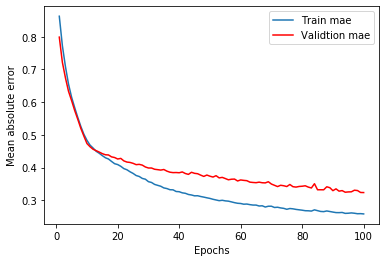

In [83]:
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'], 'r')
plt.legend([ 'Train mae' , 'Validtion mae' ])
plt.xlabel('Epochs')
plt.ylabel('Mean absolute error')
plt.show()

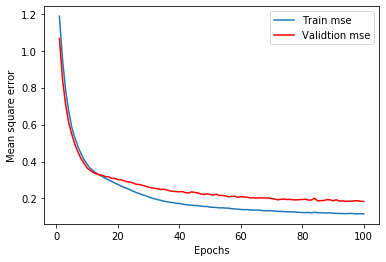

In [84]:
plt.clf()
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], 'r')
plt.legend([ 'Train mse' , 'Validtion mse' ])
plt.xlabel('Epochs')
plt.ylabel('Mean square error')
plt.show()

## Model with Droupout

In [85]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation = 'tanh', input_shape = (8,)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(8, activation = 'tanh'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(6, activation = 'tanh'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mae'])
    return model

In [86]:
model = build_model()
history = model.fit(train_data, train_targets,
                    epochs = 100,
                    batch_size = 16,
                    validation_split = 0.2)
results = model.evaluate(test_data, test_targets, verbose = 0)
print('\n', history.history.keys(),'\n\nmse, mae =', results)

Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 1s 3ms/sample - loss: 0.7897 - mae: 0.6956 - val_loss: 0.6895 - val_mae: 0.6933
Epoch 2/100
576/576 [==============================] - 0s 262us/sample - loss: 0.6892 - mae: 0.6486 - val_loss: 0.5373 - val_mae: 0.6152
Epoch 3/100
576/576 [==============================] - 0s 278us/sample - loss: 0.5438 - mae: 0.6007 - val_loss: 0.4675 - val_mae: 0.5751
Epoch 4/100
576/576 [==============================] - 0s 273us/sample - loss: 0.5924 - mae: 0.6140 - val_loss: 0.4344 - val_mae: 0.5503
Epoch 5/100
576/576 [==============================] - 0s 254us/sample - loss: 0.4805 - mae: 0.5533 - val_loss: 0.4129 - val_mae: 0.5320
Epoch 6/100
576/576 [==============================] - 0s 276us/sample - loss: 0.4430 - mae: 0.5181 - val_loss: 0.3918 - val_mae: 0.5123
Epoch 7/100
576/576 [==============================] - 0s 278us/sample - loss: 0.4376 - mae: 0.5188 - val_loss: 0.3745 - val_mae: 0.49

576/576 [==============================] - 0s 255us/sample - loss: 0.2748 - mae: 0.4068 - val_loss: 0.2041 - val_mae: 0.3561
Epoch 61/100
576/576 [==============================] - 0s 238us/sample - loss: 0.2793 - mae: 0.4126 - val_loss: 0.2006 - val_mae: 0.3541
Epoch 62/100
576/576 [==============================] - 0s 219us/sample - loss: 0.2590 - mae: 0.3970 - val_loss: 0.1989 - val_mae: 0.3518
Epoch 63/100
576/576 [==============================] - 0s 229us/sample - loss: 0.2502 - mae: 0.3935 - val_loss: 0.2023 - val_mae: 0.3548
Epoch 64/100
576/576 [==============================] - 0s 215us/sample - loss: 0.2762 - mae: 0.4062 - val_loss: 0.2001 - val_mae: 0.3526
Epoch 65/100
576/576 [==============================] - 0s 205us/sample - loss: 0.2738 - mae: 0.4047 - val_loss: 0.2036 - val_mae: 0.3546
Epoch 66/100
576/576 [==============================] - 0s 210us/sample - loss: 0.2528 - mae: 0.3895 - val_loss: 0.2069 - val_mae: 0.3561
Epoch 67/100
576/576 [=========================

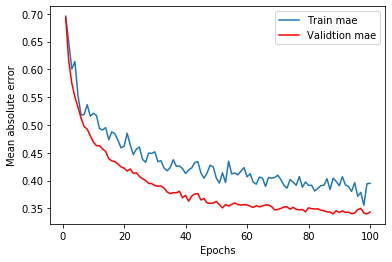

In [87]:
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'], 'r')
plt.legend([ 'Train mae' , 'Validtion mae' ])
plt.xlabel('Epochs')
plt.ylabel('Mean absolute error')
plt.show()

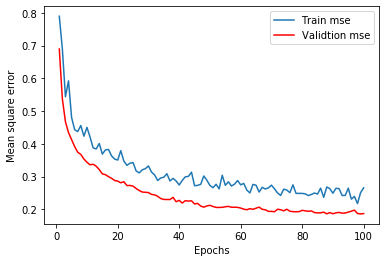

In [88]:
plt.clf()
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], 'r')
plt.legend([ 'Train mse' , 'Validtion mse' ])
plt.xlabel('Epochs')
plt.ylabel('Mean square error')
plt.show()

## Model without validation and Dropout

In [89]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 100,
          batch_size = 16, verbose = 0)
results = model.evaluate(test_data, test_targets, verbose = 0)
print('\nmse, mae =', results)


mse, mae = [0.18225747144337998, 0.33588868]
